# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

**Omar's Observations**
---------------

1) The first scatter plot, 'City Latitude vs Temperature (09/03/2019)', suggests that it is hotter closer to the equator; generally, the lower the latitude, the higher the temperature.

2) The second scatter plot, 'City Latitude vs Humidity (09/03/2019)', suggests that the norther hemisphere has more humidity than the southern hemisphere as more data points are above the equator.

3) The third scatter plot, 'City Latitude vs Cloudiness (09/03/2019)', suggests that the norther hemisphere has a slightly greater degree of cloudiness than the southern hemisphere as more data points are above the equator. This scatter plot also suggests that the measure of cloudiness may be more categorical than other data (i.e., temperature, humidity) - as there are concentrations of cloudiness data around the 0, 20, 40, 75, and 100 percentages.

4) The fourth scatter plot, 'City Latitude vs Windspeed (09/03/2019)', suggests less of a relationship between the latitude and windspeed in cities, and also that windspeeds above 10mph are generally rare. 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [43]:
# List for holding lat_lngs and cities
cities = []
country = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=5000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=5000)
lat_lngs = tuple(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lats,lngs in lat_lngs:
    city = citipy.nearest_city(lats, lngs)
    cityName = city.city_name
    cities.append(cityName)
    country.append(city.country_code)

# Print the city count to confirm sufficient count
len(cities)

5000

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
# Create a df to store all the city data and to later add in the weather data
df_cities = pd.DataFrame({'Cities': cities,
                         'Country': country})

# Create blank columns to store the OpenWeather data
df_cities['Latitude'] = ''
df_cities['Longitude'] = ''
df_cities['Temperature (F)'] = ''
df_cities['Humidity (%)'] = ''
df_cities['Cloudiness (%)'] = ''
df_cities['Windspeed (mph)'] = ''

# Remove all duplicate values from 'Cities' column
df_cities = df_cities.drop_duplicates(subset=['Cities'], keep='first')
df_cities.count()

In [46]:
# Create loop for successive calls to OpenWeather API
for index,row in df_cities.iterrows():
    city_name = row['Cities']
    country_id = row['Country']
    
    # Api call for cities
    api_url = "http://api.openweathermap.org/data/2.5/weather?q=" \
    "{},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,country_id,api_key)
    
    city_info = requests.get(api_url).json()
    
    print (f'Processing Record {index} of Set 1 | {city_name}')

    try: 
        df_cities.iat[index,2] = city_info['coord']['lat']
        df_cities.iat[index,3] = city_info['coord']['lon']
        df_cities.iat[index,4] = city_info['main']['temp']
        df_cities.iat[index,5] = city_info['main']['humidity']
        df_cities.iat[index,6] = city_info['clouds']['all']
        df_cities.iat[index,7] = city_info['wind']['speed']
    
    except KeyError:
        df_cities.iat[index,2] = np.nan
        df_cities.iat[index,3] = np.nan
        df_cities.iat[index,4] = np.nan
        df_cities.iat[index,5] = np.nan
        df_cities.iat[index,6] = np.nan
        df_cities.iat[index,7] = np.nan
        
        print('City not found ... skipping')


Processing Record 0 of Set 1 | mataura
City not found ... skipping
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | charleston
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | stornoway
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | touros
Processing Record 13 of Set 1 | attawapiskat
City not found ... skipping
Processing Record 14 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | vao
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | alta floresta
Processing Record 22 of Set 1 | lebu
Processing Record 25 of Set 1 | nuevitas
Processing Record 26 of Set 1 | marsh harbour
Processing Record 27 of Set 1 | hilo
Processing Record 28 of Set 1 | kaitangata
Pr

IndexError: index 1469 is out of bounds for axis 0 with size 1466

In [3]:
# THIS IS THE EXAMPLE PROVIDED

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
# Convert all the API values pulled in into numerical values
df_cities['Latitude'] = pd.to_numeric(df_cities['Latitude'])
df_cities['Longitude'] = pd.to_numeric(df_cities['Longitude'])
df_cities['Temperature (F)'] = pd.to_numeric(df_cities['Temperature (F)'])
df_cities['Humidity (%)'] = pd.to_numeric(df_cities['Humidity (%)'])
df_cities['Cloudiness (%)'] = pd.to_numeric(df_cities['Cloudiness (%)'])
df_cities['Windspeed (mph)'] = pd.to_numeric(df_cities['Windspeed (mph)'])

# Display the df_cities
df_cities.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Windspeed (mph)
0,mataura,pf,NaN,NaN,NaN,NaN,NaN,NaN
1,punta arenas,cl,-53.16,-70.91,33.06,86.0,0.0,6.93
2,talnakh,ru,69.49,88.39,48.20,93.0,75.0,2.24
3,bluff,nz,-46.60,168.33,45.00,94.0,100.0,1.01
4,cabo san lucas,mx,22.89,-109.91,75.79,65.0,5.0,9.17


In [48]:
# Clean up and remove the NaN values
length_of_orig_df_cities = len(df_cities)
length_post_dropna = len(df_cities.dropna())
missing_weather_info = length_of_orig_df_cities - length_post_dropna
missing_weather_info

913

In [49]:
# Remove the dropped NaN values
df_cities = df_cities.dropna()

# Export to CSV file
df_cities.to_csv("../output_data/cities.csv")

In [50]:
df_cities.count()

Cities             553
Country            553
Latitude           553
Longitude          553
Temperature (F)    553
Humidity (%)       553
Cloudiness (%)     553
Windspeed (mph)    553
dtype: int64

In [4]:
# THIS IS THE EXAMPLE PROVIDED

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [51]:
df_cities.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Windspeed (mph)
1,punta arenas,cl,-53.16,-70.91,33.06,86.0,0.0,6.93
2,talnakh,ru,69.49,88.39,48.20,93.0,75.0,2.24
3,bluff,nz,-46.60,168.33,45.00,94.0,100.0,1.01
4,cabo san lucas,mx,22.89,-109.91,75.79,65.0,5.0,9.17
5,charleston,us,38.35,-81.63,66.76,88.0,75.0,6.53


In [5]:
# THIS IS THE EXAMPLE PROVIDED

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

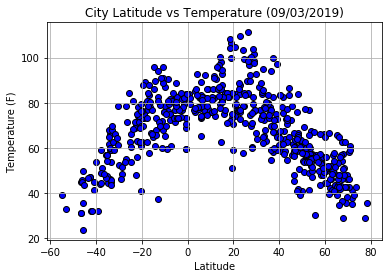

In [52]:
# Scatter plot of temperatures (y-axis) vs latitudes (x-axis)
y_temps = df_cities['Temperature (F)']
x_lats = df_cities['Latitude']

plt.scatter(x_lats, y_temps, marker="o", facecolors="blue", edgecolors="black")

# Stylize the scatter plot
plt.title("City Latitude vs Temperature (09/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# # Save Figure
plt.savefig("../Images/WeatherPy_Omar1.png", edgecolor='none', bbox_inches = 'tight', orientation='landscape')

plt.show()

#### Latitude vs. Temperature Plot

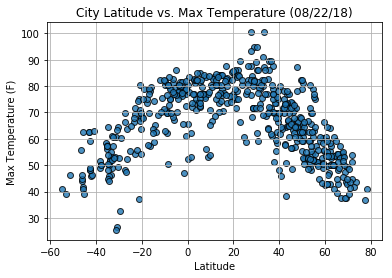

In [6]:
# THIS IS THE EXAMPLE PROVIDED

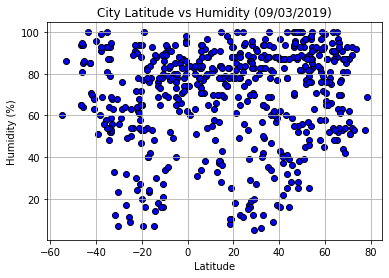

In [53]:
# Scatter plot of humidity (y-axis) vs latitudes (x-axis)
y_humidity = df_cities['Humidity (%)']
x_lats = df_cities['Latitude']

plt.scatter(x_lats, y_humidity, marker="o", facecolors="blue", edgecolors="black")

# Stylize the scatter plot
plt.title("City Latitude vs Humidity (09/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# # Save Figure
plt.savefig("../Images/WeatherPy_Omar2.png", edgecolor='none', bbox_inches = 'tight', orientation='landscape')

plt.show()

#### Latitude vs. Humidity Plot

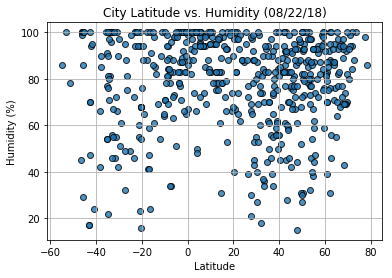

In [7]:
# THIS IS THE EXAMPLE PROVIDED

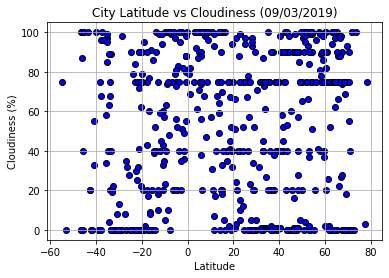

In [54]:
# Scatter plot of cloudiness (y-axis) vs latitudes (x-axis)
y_clouds = df_cities['Cloudiness (%)']
x_lats = df_cities['Latitude']

plt.scatter(x_lats, y_clouds, marker="o", facecolors="blue", edgecolors="black")

# Stylize the scatter plot
plt.title("City Latitude vs Cloudiness (09/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# # Save Figure
plt.savefig("../Images/WeatherPy_Omar3.png", edgecolor='none', bbox_inches = 'tight', orientation='landscape')

plt.show()

#### Latitude vs. Cloudiness Plot

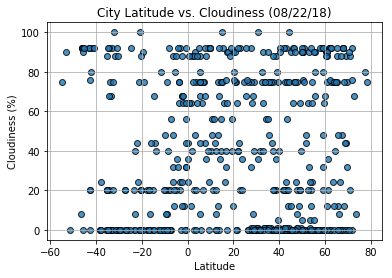

In [8]:
# THIS IS THE EXAMPLE PROVIDED

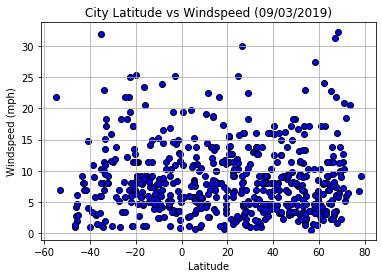

In [55]:
# Scatter plot of windspeed (y-axis) vs latitudes (x-axis)
y_wind = df_cities['Windspeed (mph)']
x_lats = df_cities['Latitude']

plt.scatter(x_lats, y_wind, marker="o", facecolors="blue", edgecolors="black")

# Stylize the scatter plot
plt.title("City Latitude vs Windspeed (09/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid(True)

# # Save Figure
plt.savefig("../Images/WeatherPy_Omar4.png", edgecolor='none', bbox_inches = 'tight', orientation='landscape')

plt.show()

#### Latitude vs. Wind Speed Plot

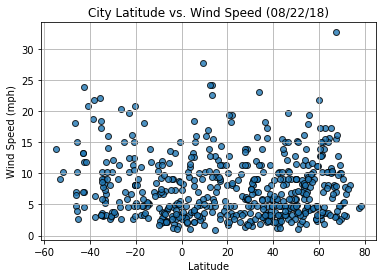

In [9]:
# THIS IS THE EXAMPLE PROVIDED